In [1]:
import geopandas 
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


%matplotlib inline

In [2]:
track_line_gdf = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_5day_lin.shp')
cone_gdf       = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_5day_pgn.shp')
points_gdf     = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_5day_pts.shp')
ww_gdf         = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_ww_wwlin.shp')

init_radii_gdf = geopandas.read_file('laura_shape_files/al132020_fcst_011/al132020_2020082215_initialradii.shp')
fcst_radii_gdf = geopandas.read_file('laura_shape_files/al132020_fcst_011/al132020_2020082215_forecastradii.shp')

best_track_points_gdf = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_pts.shp')
best_track_line_gdf   = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_lin.shp')
best_track_radii_gdf  = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_radii.shp')
best_track_swath_gdf  = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_windswath.shp')

wsp_34_gdf = geopandas.read_file('laura_shape_files/wsp_120hrhalfDeg_latest/2021071912_wsp34knt120hr_halfDeg.shp')
wsp_50_gdf = geopandas.read_file('laura_shape_files/wsp_120hrhalfDeg_latest/2021071912_wsp50knt120hr_halfDeg.shp')
wsp_64_gdf = geopandas.read_file('laura_shape_files/wsp_120hrhalfDeg_latest/2021071912_wsp64knt120hr_halfDeg.shp')


In [3]:
map_crs = ccrs.PlateCarree()
data_crs= ccrs.PlateCarree()

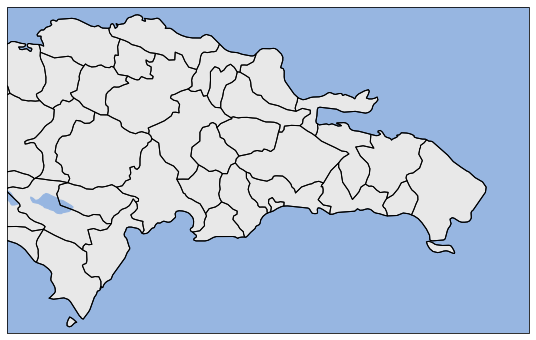

In [4]:
fig = plt.figure(figsize=(10, 6))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

#ax.set_extent([-100, -50, 10, 40])

ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.LAKES)
ax.add_feature(cfeat.STATES)
ax.add_feature(cfeat.LAND, color = 'lightgray', alpha = 0.5)
ax.add_feature(cfeat.OCEAN)

#ax.add_feature(cfeat.OCEAN.with_scale('50m'))

ax.set_extent([-72, -68, 17.5, 20])


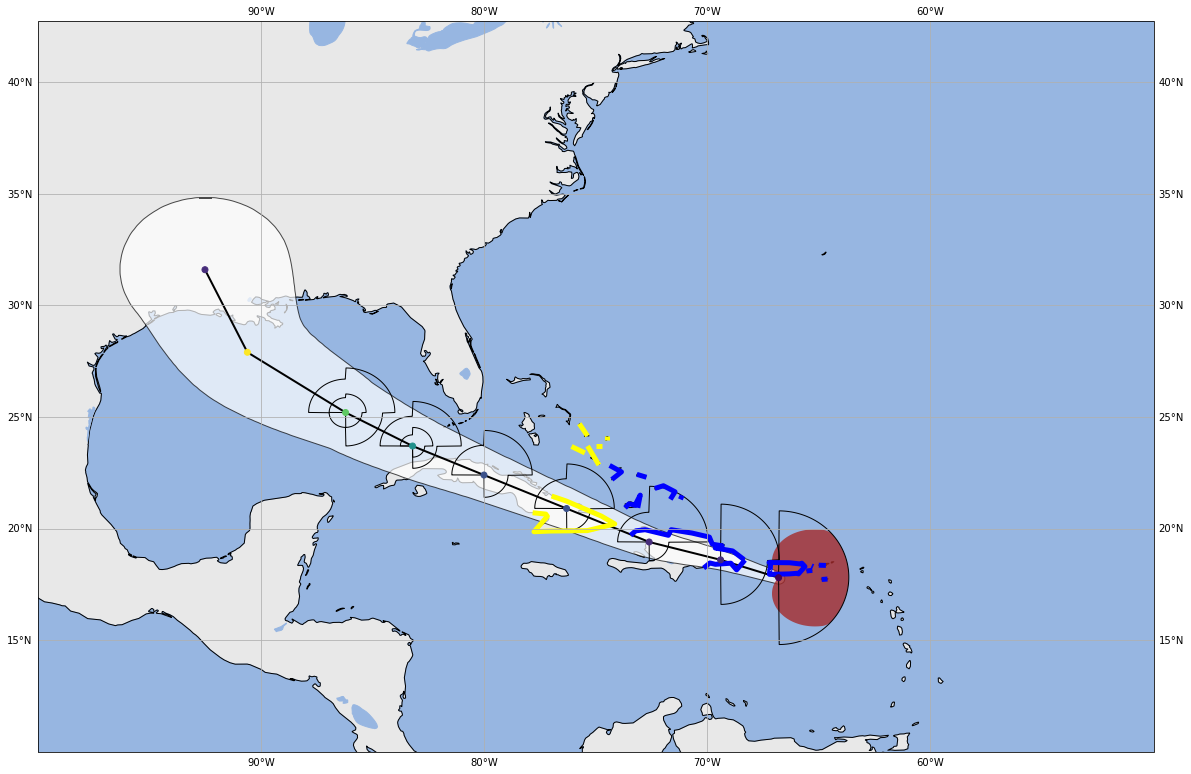

In [5]:
fig = plt.figure(figsize=(20, 20))
ax = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-100, -50, 10, 40])

ax.add_feature(cfeat.COASTLINE)
#ax.add_feature(cfeat.STATES)
ax.add_feature(cfeat.LAND, color = 'lightgray', alpha = 0.5)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAKES)
#ax.add_feature(cfeat.OCEAN.with_scale('50m'))

ax.add_geometries(cone_gdf['geometry'], crs=data_crs, facecolor='white',
                 edgecolor='black', linewidth=1, alpha=0.7)
ax.add_geometries(track_line_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=2)
sc = ax.scatter(points_gdf['LON'], points_gdf['LAT'],transform=data_crs,
                zorder=10, c=points_gdf['MAXWIND'])
ax.add_geometries(init_radii_gdf['geometry'], crs=data_crs, facecolor='brown',
                 edgecolor='none', linewidth=0.1, alpha=0.8)
ax.add_geometries(fcst_radii_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1)


ww_colors = {'TWA': 'yellow',
             'HWA': 'pink',
             'TWR': 'blue',
             'HWR': 'tab:red'}

for ww_type in ww_colors.keys():
    ww_subset = ww_gdf[ww_gdf['TCWW']==ww_type]
    ax.add_geometries(ww_subset['geometry'], facecolor='none',
                     edgecolor=ww_colors[ww_type], crs=data_crs,
                     linewidth=5)
#plt.colorbar(sc)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER



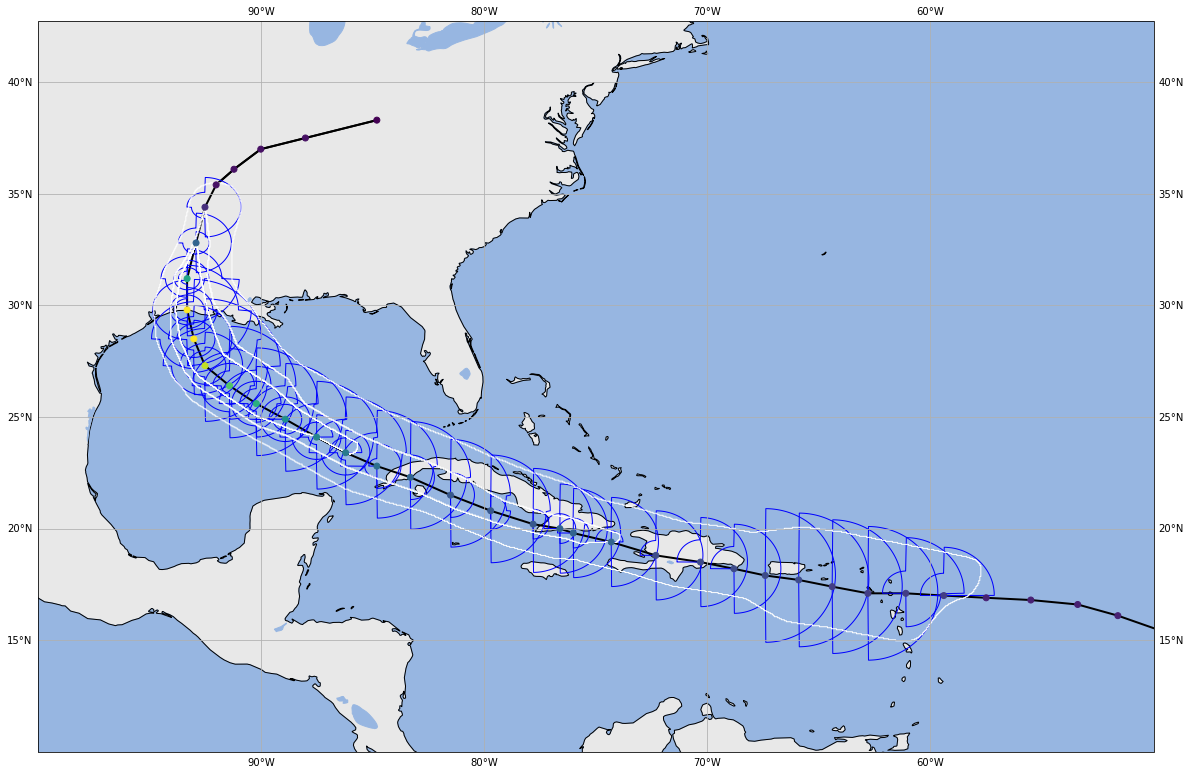

In [6]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-100, -50, 10, 40])

ax.add_feature(cfeat.COASTLINE)
#ax.add_feature(cfeat.STATES)
ax.add_feature(cfeat.LAND, color = 'lightgray', alpha = 0.5)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAKES)
#ax.add_feature(cfeat.OCEAN.with_scale('50m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER

sc_2 = ax.scatter(best_track_points_gdf['LON'], best_track_points_gdf['LAT'],
                  transform=data_crs, zorder=10, c=best_track_points_gdf['INTENSITY'])
ax.add_geometries(best_track_line_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=2)
ax.add_geometries(best_track_radii_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='blue')
ax.add_geometries(best_track_swath_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='white')

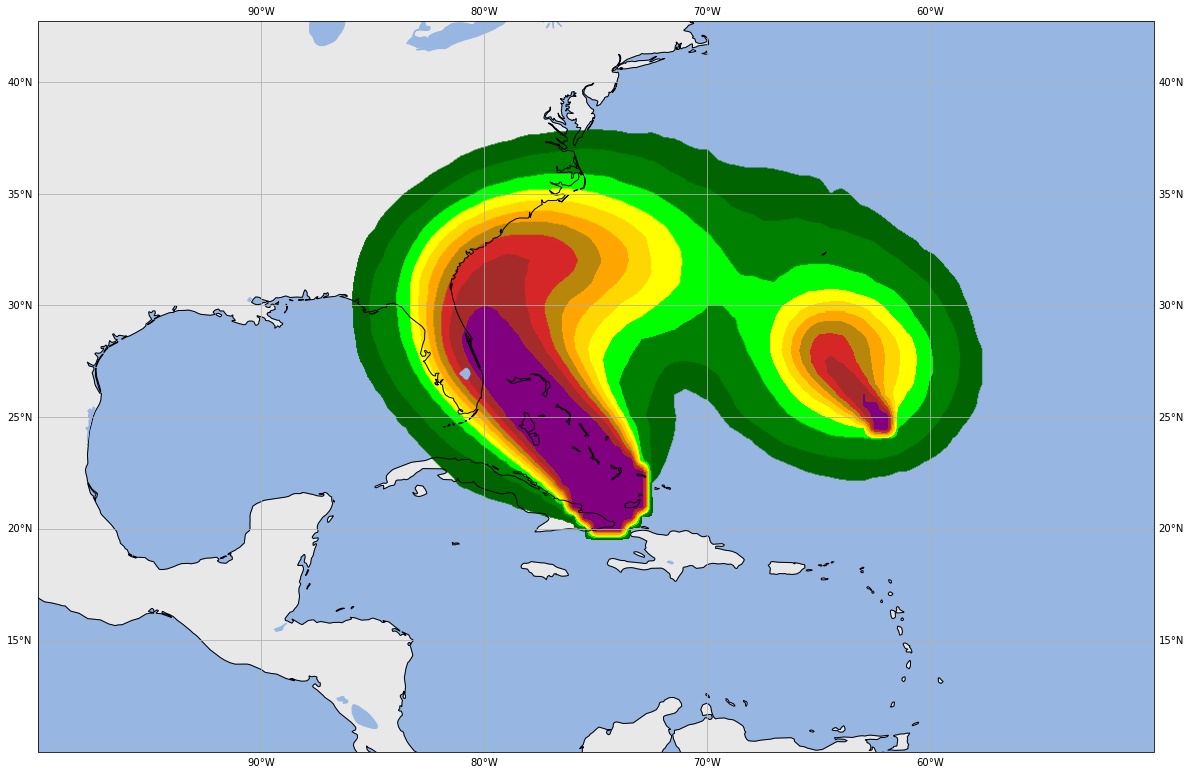

In [7]:
fig2 = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-100, -50, 10, 40])

ax.add_feature(cfeat.COASTLINE)
#ax.add_feature(cfeat.STATES)
ax.add_feature(cfeat.LAND, color = 'lightgray', alpha = 0.5)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAKES)
#ax.add_feature(cfeat.OCEAN.with_scale('50m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER


wsp_34_polygon_gdf = geopandas.read_file('../WSP/2016100512_wsp34knt120hr_5km.shp')
#wsp_34_point_gdf = geopandas.read_file('../WSP/2016100512_wsp34knt120hr_halfDeg.shp')


#ax.add_geometries(wsp_34_polygon_gdf['geometry'], crs=data_crs, facecolor='brown',
                 #edgecolor='none', alpha=0.8)

wsp_colors = {'<5%'   : 'none','5-10%': 'darkgreen','10-20%': 'green','20-30%': 'lime',
              '30-40%': 'yellow','40-50%': 'gold','50-60%': 'orange','60-70%': 'darkgoldenrod',
              '70-80%': 'tab:red','80-90%': 'brown','>90%': 'purple'}

for wsp_type in wsp_colors.keys():
    ww_subset = wsp_34_polygon_gdf[wsp_34_polygon_gdf['PERCENTAGE']== wsp_type]
    ax.add_geometries(ww_subset['geometry'], facecolor=wsp_colors[wsp_type],
                     edgecolor=wsp_colors[wsp_type], crs=data_crs,
                     linewidth=1, alpha = 1, zorder=-1)

